In [64]:
import imblearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [65]:
customer= pd.read_csv('files_for_lab/customer_churn.csv')
print(customer.shape)
customer.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [66]:
customer_a= customer[['tenure','SeniorCitizen','MonthlyCharges','Churn']]

In [67]:
customer["Churn"] = customer["Churn"].str.replace('Yes', '1').str.replace('No', '0').astype(int)

In [68]:
y= customer['Churn']

In [69]:
X= customer_a.drop('Churn',axis=1)

In [70]:
customer.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

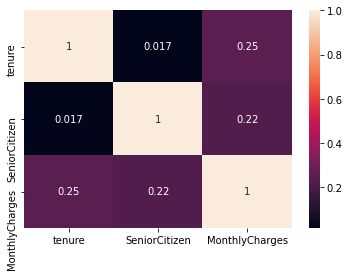

In [71]:
correlation_matrix= X.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.show()

In [72]:
correlation_matrix

,tenure,SeniorCitizen,MonthlyCharges
tenure,1.000000,0.016567,0.247900
SeniorCitizen,0.016567,1.000000,0.220173
MonthlyCharges,0.247900,0.220173,1.000000


In [73]:
transformer = StandardScaler().fit(X)
X_scaled = pd.DataFrame(transformer.transform(X),columns=X.columns)
X_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges
0,-1.277445,-0.439916,-1.160323
1,0.066327,-0.439916,-0.259629
2,-1.236724,-0.439916,-0.362660
3,0.514251,-0.439916,-0.746535
4,-1.236724,-0.439916,0.197365


In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X_scaled,y,random_state=0)

In [75]:
from sklearn.linear_model import LogisticRegression

LR= LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train,y_train)
LR.score(X_test,y_test)

0.7808063600227144

In [76]:
X_test.shape

(1761, 3)

In [77]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred= LR.predict(X_test)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.6115942028985507
recall:  0.4557235421166307
f1:  0.5222772277227723


In [78]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X, y)
predictions_clf = clf.predict(X_test)
clf.score(X_test, y_test)

0.7370812038614424

In [79]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[1164,  134],
       [ 252,  211]])

In [80]:
from sklearn.utils import resample

In [81]:
train = pd.concat([X_train, y_train],axis=1)
train.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
3296,-0.340876,-0.439916,-0.513884,0
6397,0.880735,2.273159,0.016229,0
6043,-1.196004,-0.439916,-0.817993,1
5309,1.165777,-0.439916,-1.479388,0
3000,-0.829521,-0.439916,0.654359,1


In [83]:
no_churn = train[train['Churn']==0]
yes_churn = train[train['Churn']==1]

In [84]:
yes_churn_oversampled = resample(yes_churn, replace=True, n_samples = len(no_churn), random_state=0)

In [85]:
display(no_churn.shape)
display(yes_churn_oversampled.shape)

(3876, 4)

(3876, 4)

In [86]:
train_oversampled = pd.concat([no_churn,yes_churn_oversampled])
train_oversampled.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
3296,-0.340876,-0.439916,-0.513884,0
6397,0.880735,2.273159,0.016229,0
5309,1.165777,-0.439916,-1.479388,0
3101,1.043616,-0.439916,0.499812,0
2868,-0.259435,-0.439916,0.697566,0


In [88]:
y_train_over = train_oversampled['Churn'].copy()
X_train_over = train_oversampled.drop('Churn',axis = 1).copy()

In [90]:
no_churn_undersampled = resample(no_churn, replace=False, n_samples = len(yes_churn), random_state=0)

In [91]:
display(yes_churn.shape)
display(no_churn_undersampled.shape)

(1406, 4)

(1406, 4)

In [92]:
train_undersampled = pd.concat([yes_churn,no_churn_undersampled])
train_undersampled.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
6043,-1.196004,-0.439916,-0.817993,1
3000,-0.829521,-0.439916,0.654359,1
6012,-1.114563,-0.439916,0.626109,1
2407,-1.236724,-0.439916,0.197365,1
3325,-1.155283,-0.439916,0.694243,1


In [94]:
y_train_under = train_undersampled['Churn'].copy()
X_train_under = train_undersampled.drop('Churn',axis = 1).copy()

In [95]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=100,sampling_strategy='minority',k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train,y_train)

In [96]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train, y_train)
LR.score(X_test, y_test)

0.7808063600227144

In [97]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred = LR.predict(X_test)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.6115942028985507
recall:  0.4557235421166307
f1:  0.5222772277227723


In [98]:
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_over, y_train_over)
pred = LR.predict(X_test)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.4790764790764791
recall:  0.7170626349892009
f1:  0.57439446366782


In [99]:
# Undersampled train/test results
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_under, y_train_under)
pred = LR.predict(X_test)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.47701149425287354
recall:  0.7170626349892009
f1:  0.5729076790336497


In [100]:
# SMOTE train/test results
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.4776978417266187
recall:  0.7170626349892009
f1:  0.5734024179620035


In [101]:
confusion_matrix(y_test,pred)

array([[935, 363],
       [131, 332]])